# k-means clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## k-means 介紹
k-means演算法在一個未標籤的多維資料集中搜尋一個預先定義數目的群組。它籍由使用一個簡單的最佳化集群看起來的樣子之概念來完成
* 「群組中心」是所有同一群組中的所有點之算術平均
* 群組中的每一個點都比其他群組的點還要更接近群組中心


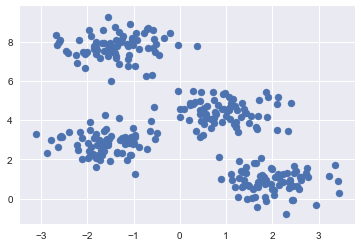

In [2]:
# 產生一個二組的，含有4個獨立的區塊。(非監督式)
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
# 以上用肉眼觀察，相對簡單可以挑出4個群組。
# k-means可以自動地做這件，使用 Scikit-Learn 中的KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

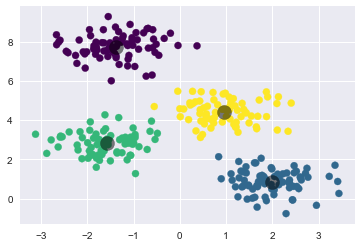

In [4]:
# 透過著色標籤資料來視覺化其結果，也標出被 k-mean 評估器所決定出的群組中心
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 群組中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## k-mean 演算法：最大期望算法
最大期望算法(E-M)，由以下幾個程序所組成的：
1. 猜測一些群組的中心
2. 重複一直到收歛：
  1. E-Step(Expectation step)：指定一些點到最近的群組中心
  2. M-Step(Maximization step)：設定群組中心為其平均值



* E-Step：包含了更新我們對於每一個點屬於的群組之期望
* M-Step：包括最大化一些適應函數(fitness function)

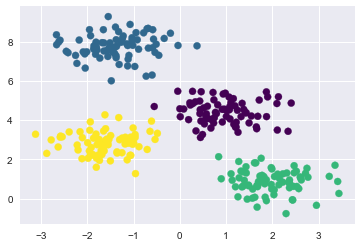

In [8]:
# k-mean實作
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1.隨機選取群組
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. 基於最近的中心設定標籤
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. 從點的平均找出新的中心
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # 2c. 檢查是否收歛
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

## 最大期望算法的一些警示